In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
data = pd.read_csv("Leads.csv")

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.shape

(9240, 37)

In [6]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# data cleaning

In [10]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Eliminate the column having more than 3000 missing values as analysis with this missing value is not useful

In [12]:
# Drop all columns having missing value greater than 3000
for col in data.columns:
    if data[col].isnull().sum() > 3000:
        data.drop(col, 1, inplace=True)

In [13]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# City and Country column can be dropped as it is not used in our analysis
data.drop(['City'], axis = 1, inplace = True)
data.drop(['Country'], axis = 1, inplace = True)

In [15]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [16]:
data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

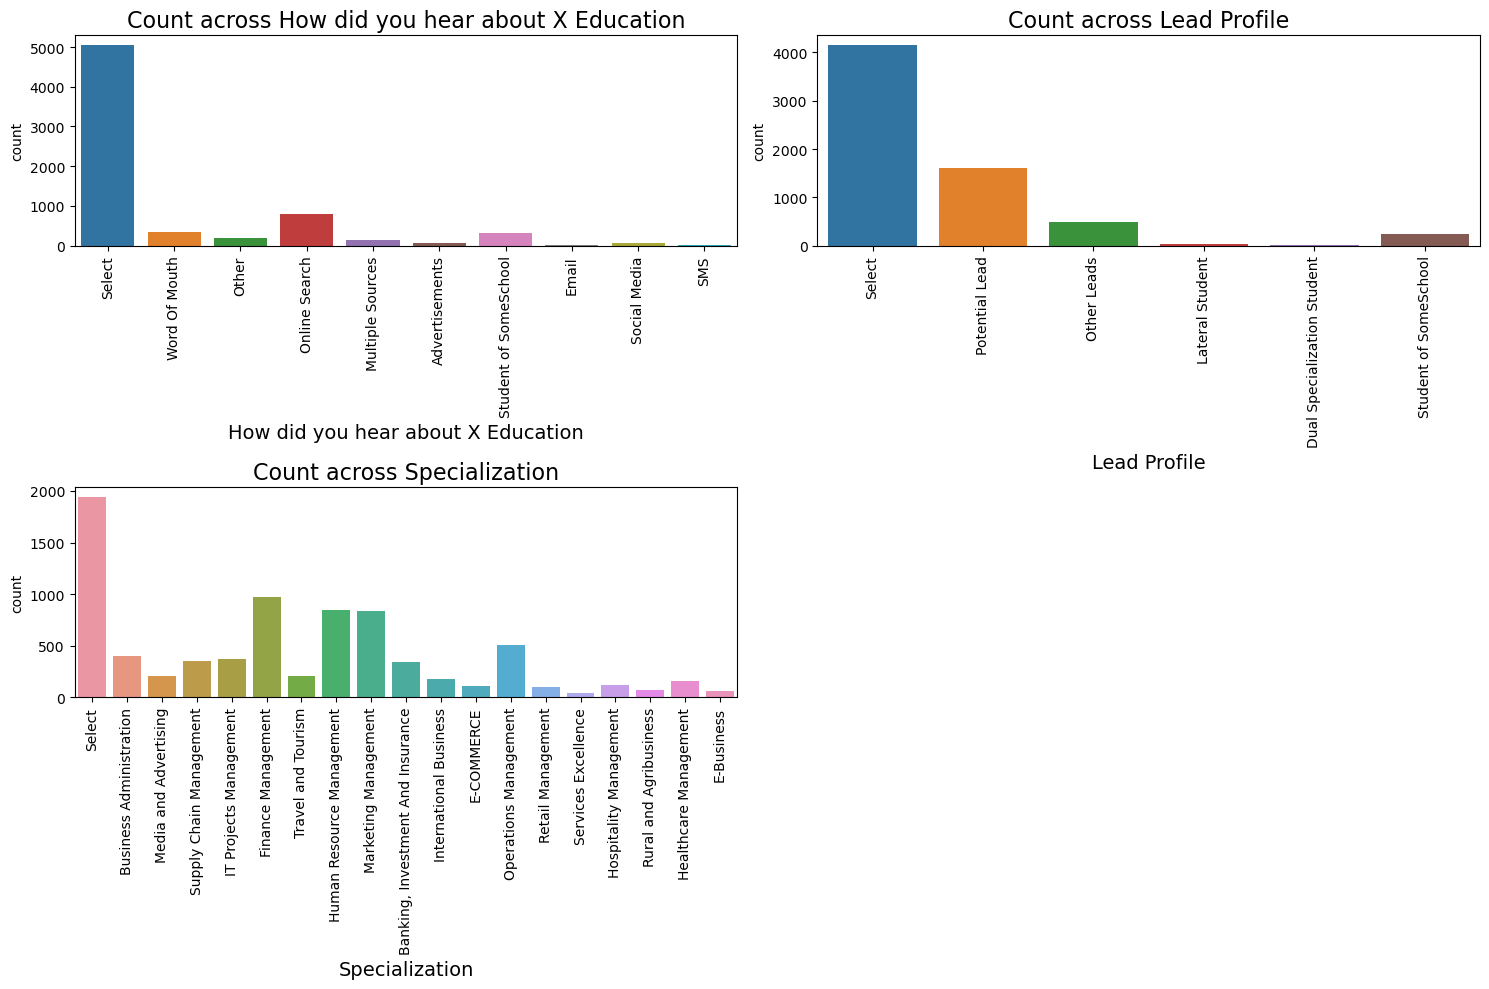

In [17]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [18]:
# We need to count the value of select because it is equivalent to missing values.
# checking the value counts of all the columns

for a in data:
    print(data[a].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [19]:
data['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [21]:
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# Above three column have select 
# We can drop "Lead Profile" and "How did you hear about X Education"

In [23]:
data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [24]:
# Only one value was majorly present in below mentioned columns:
# Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, 
# Through Recommendations, Receive More Updates About Our Courses,What matters most to you in choosing a course
# Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.

data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [25]:
data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [26]:
# Check the number of null values again

data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
# drop the null rows for the column What is you current occupation
data = data[~pd.isnull(data['What is your current occupation'])]

In [28]:
# Check the number of null values again

data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [29]:
# Drop the null value rows in the column 'TotalVisits'

data = data[~pd.isnull(data['TotalVisits'])]

In [30]:
# Check the number of null values again

data.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
# Drop the null value rows in the column 'Lead Source'

data = data[~pd.isnull(data['Lead Source'])]

In [32]:
# Check the number of null values again

data.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [33]:
# Drop the null value rows in the column 'Specialization'

data = data[~pd.isnull(data['Specialization'])]

In [34]:
# Check the number of null values again

data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [35]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [36]:
data.shape

(6373, 14)

In [37]:
# Prospect Id and Lead Number column not used in our analysis,so it better to drop both column
data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [38]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [39]:
# Converted is the target variable
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

48.093519535540565

In [40]:
# The lead conversion rate is 48%

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Pay per Click Ads'),
  Text(9, 0, 'bing'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Click2call'),
  Text(13, 0, 'Live Chat'),
  Text(14, 0, 'testone'),
  Text(15, 0, 'Press_Release')])

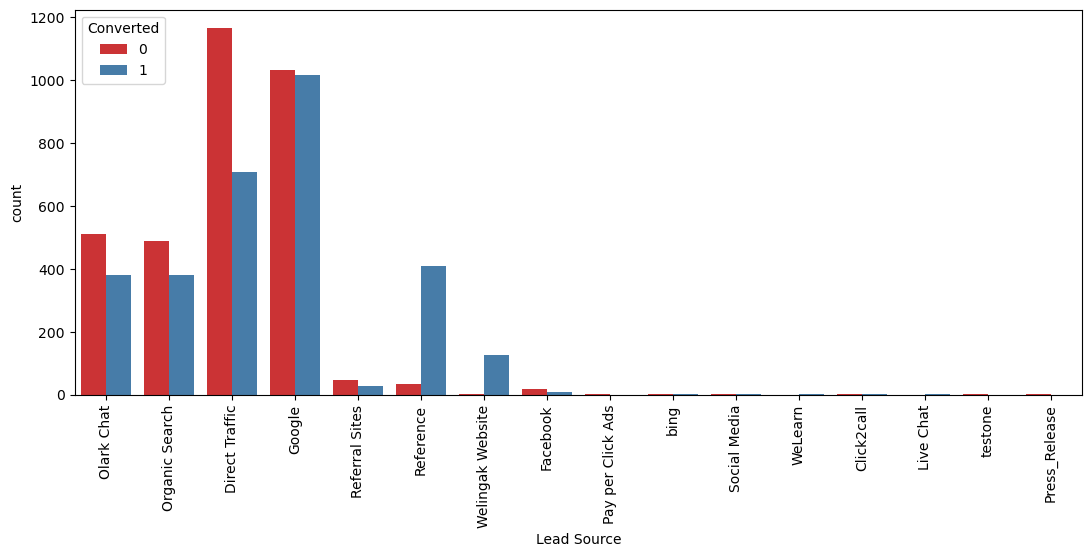

In [47]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette='Set1')
plt.xticks(rotation = 90)

In [52]:
# Direct Traffic and Google generates maximum number of leads.
# Conversion Rate of reference leads and leads through welingak website is high

In [53]:
# To improve overall lead conversion rate, focus should be on improving lead converion of olark chat,
# organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

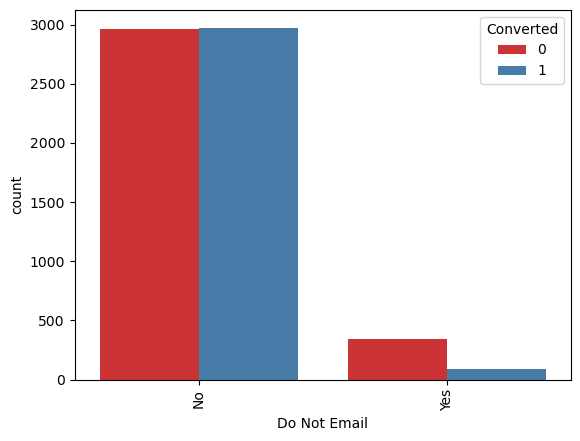

In [54]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

In [55]:
# Most entries are 'No'. No Inference can be drawn with this parameter.

<AxesSubplot:xlabel='TotalVisits'>

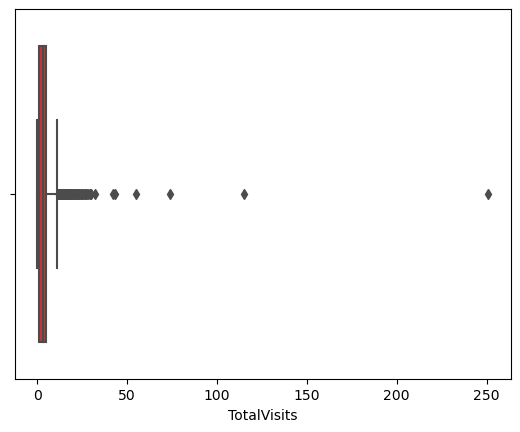

In [59]:
sns.boxplot(data['TotalVisits'],orient='vert',palette='Set1')

In [60]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

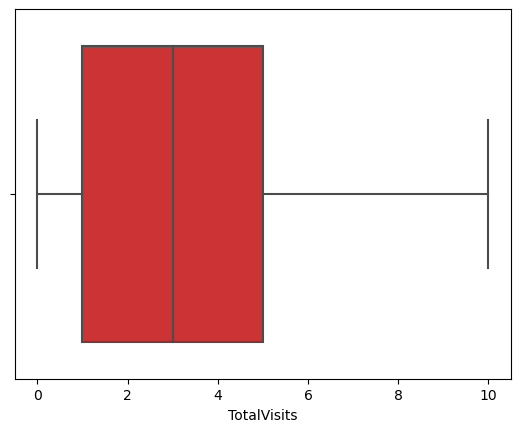

In [61]:
# Visualizing again
sns.boxplot(data['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

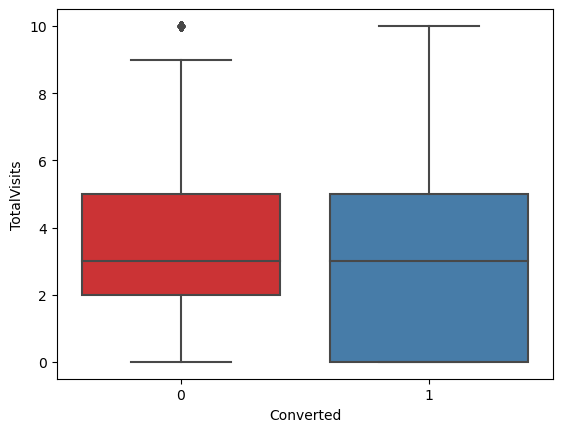

In [62]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,palette='Set1')

In [63]:
# median for converted and non converted leads are almost same.Nothing can be concluded.

<AxesSubplot:xlabel='Total Time Spent on Website'>

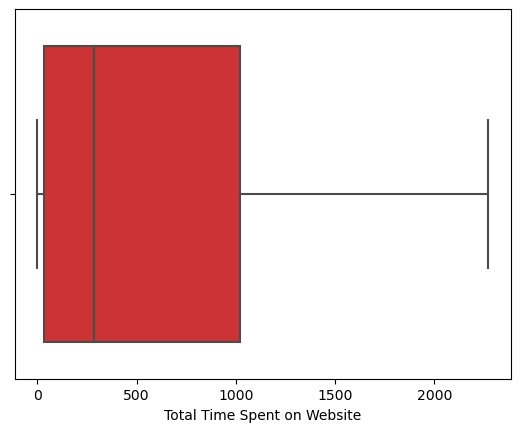

In [64]:
sns.boxplot(data['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

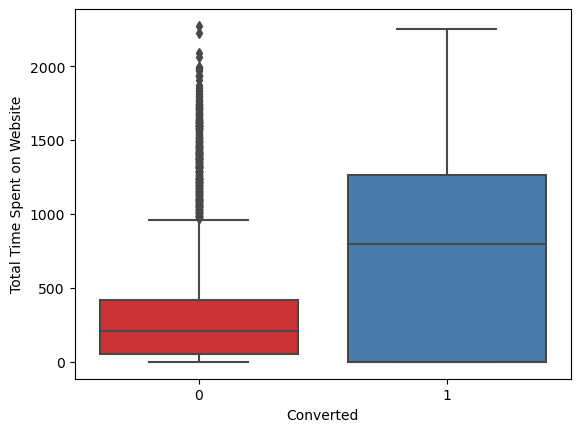

In [65]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data,palette='Set1')

In [66]:
# Spending more time on website are more likely to be converted.

<AxesSubplot:xlabel='Page Views Per Visit'>

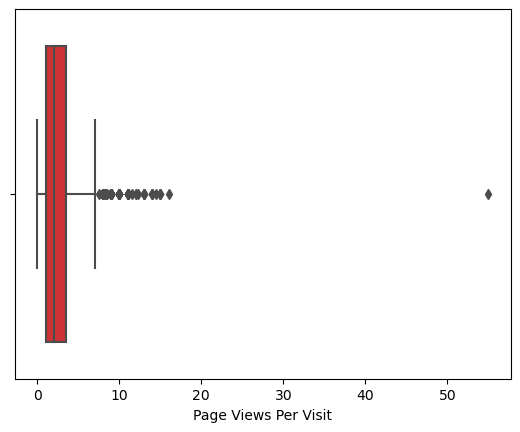

In [67]:
sns.boxplot(data['Page Views Per Visit'],orient='vert',palette='Set1')

In [68]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

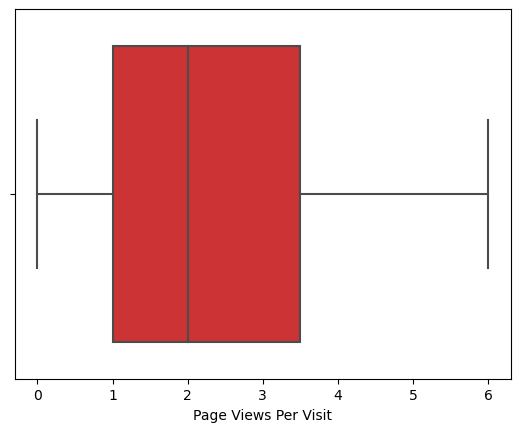

In [69]:
# Visualizing again
sns.boxplot(data['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

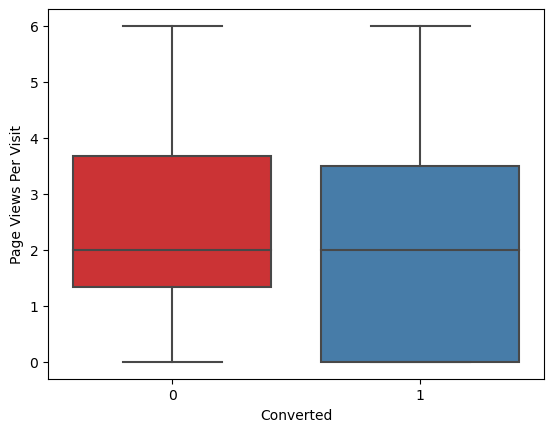

In [70]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =data,palette='Set1')

In [71]:
# Median are almost same for converted and not converted leads.Nothing can be concluded with this column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Bounced'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

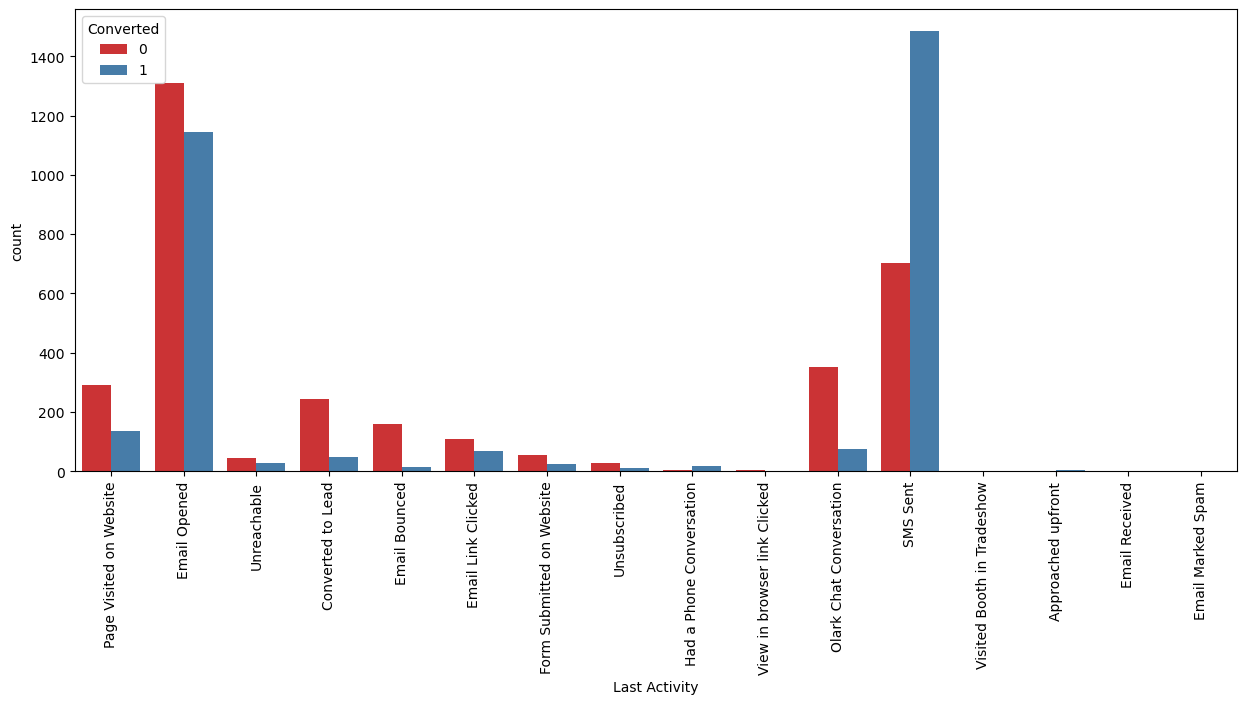

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

In [73]:
# Email opened are common in most of the converted leads.
# Conversion rate with last activity as SMS sent is very high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'Travel and Tourism'),
  Text(5, 0, 'Human Resource Management'),
  Text(6, 0, 'Marketing Management'),
  Text(7, 0, 'Banking, Investment And Insurance'),
  Text(8, 0, 'Finance Management'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'IT Projects Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

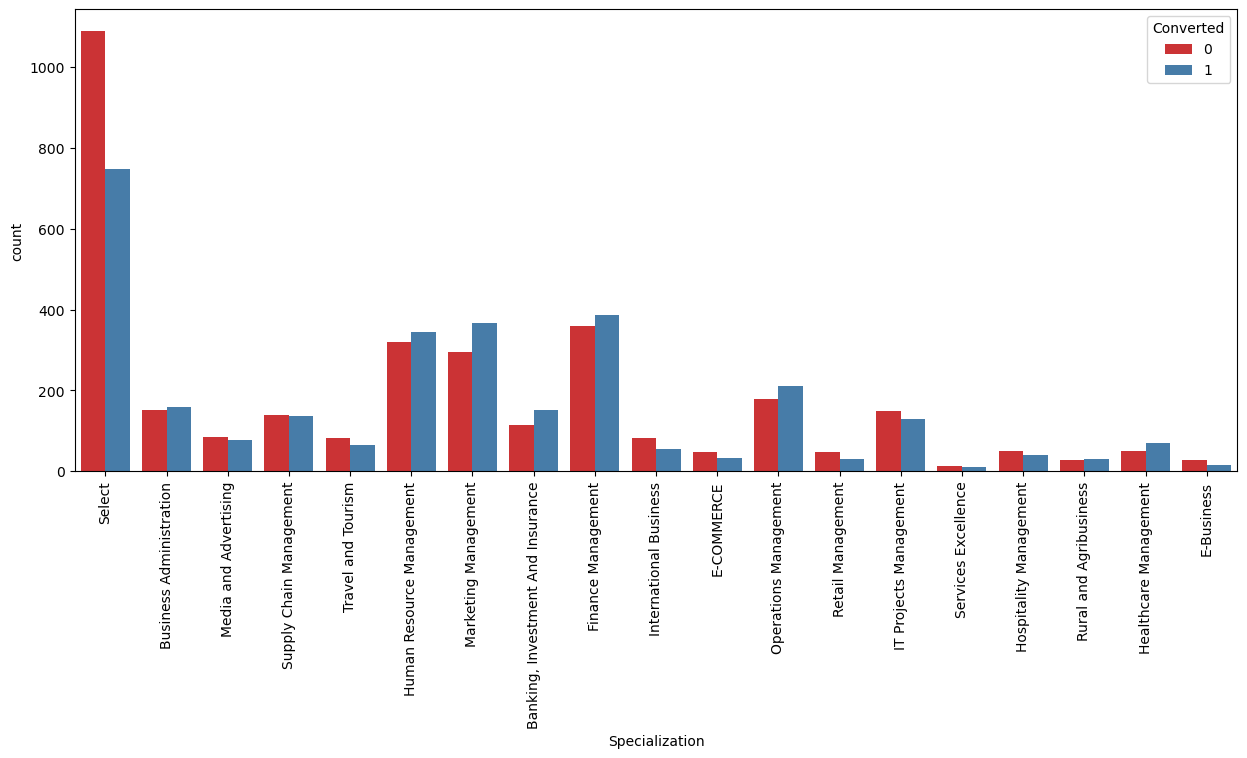

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

In [76]:
# Focus should be more on specialization with good conversion rate for above column.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

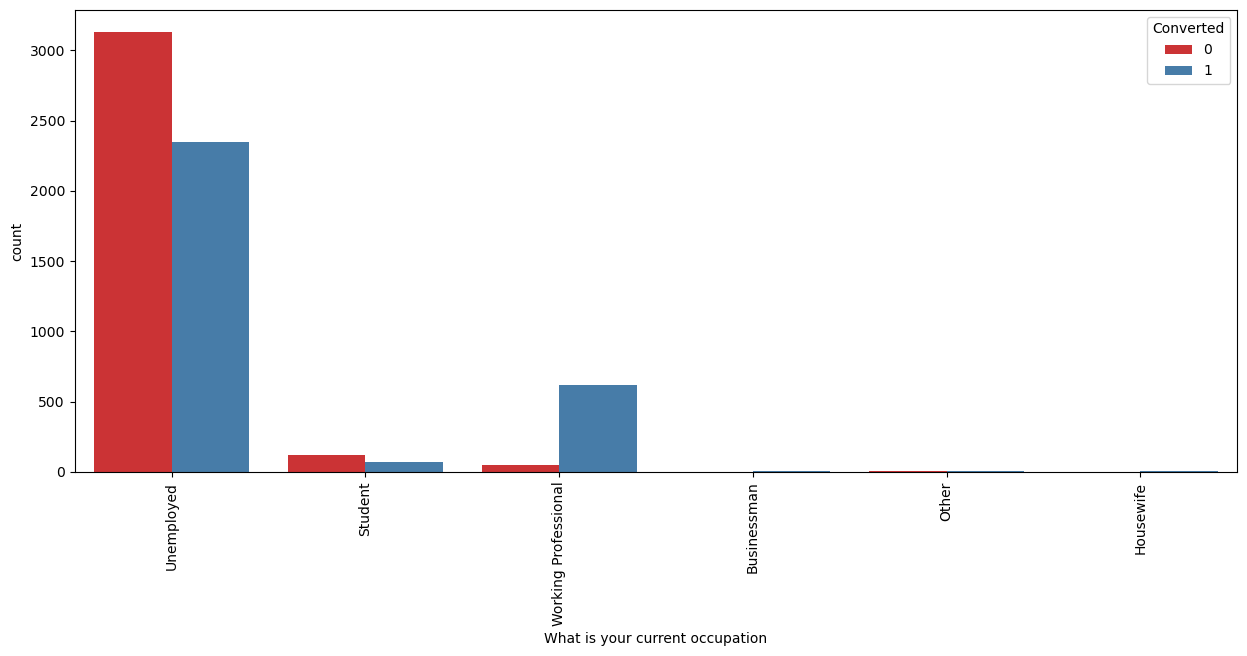

In [77]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

In [78]:
# Working professional have high conversion rate.

In [86]:
# Check the columns which are of type 'object'

temp = data.loc[:, data.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [88]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
data = pd.concat([data, dummy], axis=1)

In [89]:
# Drop the variables for which the dummy variables have been created

data = data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [90]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split

In [93]:
# Test train split
x = data.drop(['Converted'], 1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
# Put the target variable in y

y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Split the dataset into 70% train and 30% test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
# Import MinMax scaler for scaling numerical variables having different scales

from sklearn.preprocessing import MinMaxScaler

In [97]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.4,0.029489,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0.4,0.082306,0.666667,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0.6,0.034331,1.000000,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
# Checking the Lead Conversion rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

48.093519535540565

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select = 20)            
# running RFE with 20 variables as output
rfe = rfe.fit(x_train, y_train)

In [105]:
import statsmodels.api as sm

In [107]:
# Viewing columns selected by RFE
cols = x_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [108]:
x_train_sm = sm.add_constant(x_train[cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2009.8
Date:                Fri, 15 Dec 2023   Deviance:                       4019.5
Time:                        22:40:06   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6897      0.620     -1.113      0.266      -1.904       0.525
TotalVisits                                              1.3577      0.212      6.390      0.000       0.941       1.774
Total Time Spent on Website                              4.3811      0.187     23.398      0.000       4.014       4.748
Page Views Per Visit                                    -0.9482      0.221     -4.300      0.000      -1.380      -0.516
Lead Origin_Lead Add Form                                2.8546      1.213      2.353      0.019       0.477       5.232
Lead Source_Olark Chat                                   1.4751      0.149      9.892      0.000       1.183       1.767
Lead Source_Reference                                    1.2771      1.233      1.036      0.300      -1.140       3.694
Lead Source_Welingak Website                             3.2992      1.573      2.098      0.036       0.217       6.382
Do Not Email_Yes                                        -1.3672      0.223     -6.143      0.000      -1.803      -0.931
Last Activity_Email Bounced                             -1.1367      0.668     -1.701      0.089      -2.447       0.173
Last Activity_Had a Phone Conversation                   1.4576      0.992      1.470      0.142      -0.486       3.401
Last Activity_Olark Chat Conversation                   -0.7119      0.194     -3.666      0.000      -1.093      -0.331
Last Activity_SMS Sent                                   1.0146      0.087     11.711      0.000       0.845       1.184
What is your current occupation_Housewife               22.6109   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.0852      0.643     -1.688      0.091      -2.345       0.175
What is your current occupation_Unemployed              -1.2690      0.605     -2.096      0.036      -2.456      -0.082
What is your current occupation_Working Professional     1.3430      0.635      2.115      0.034       0.099       2.587
Last Notable Activity_Email Bounced                      1.3509      0.806      1.676      0.094      -0.229       2.930
Last Notable Activity_Had a Phone Conversation          22.5142   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Last Notable Activity_Modified                          -0.6681      0.095     -7.006      0.000      -0.855      -0.481
Last Notable Activity_Unreachable                        2.5268      0.807      3.131      0.002       0.945       4.108
========================================================================================================================
"""

In [109]:
# Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [110]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [111]:
# Model 2
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.1
Date:                Fri, 15 Dec 2023   Deviance:                       4024.1
Time:                        22:49:41   Pearson chi2:                 4.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0889      0.570     -0.156      0.876      -1.207       1.029
TotalVisits                                              1.3462      0.212      6.337      0.000       0.930       1.763
Total Time Spent on Website                              4.3791      0.187     23.396      0.000       4.012       4.746
Page Views Per Visit                                    -0.9537      0.221     -4.324      0.000      -1.386      -0.521
Lead Origin_Lead Add Form                                2.8460      1.213      2.347      0.019       0.469       5.223
Lead Source_Olark Chat                                   1.4660      0.149      9.842      0.000       1.174       1.758
Lead Source_Reference                                    1.2780      1.233      1.036      0.300      -1.139       3.695
Lead Source_Welingak Website                             3.3000      1.573      2.098      0.036       0.218       6.382
Do Not Email_Yes                                        -1.3728      0.223     -6.158      0.000      -1.810      -0.936
Last Activity_Email Bounced                             -1.1351      0.668     -1.698      0.089      -2.445       0.175
Last Activity_Had a Phone Conversation                   1.4575      0.991      1.470      0.141      -0.485       3.401
Last Activity_Olark Chat Conversation                   -0.7117      0.194     -3.666      0.000      -1.092      -0.331
Last Activity_SMS Sent                                   1.0147      0.087     11.714      0.000       0.845       1.185
What is your current occupation_Student                 -1.6776      0.598     -2.805      0.005      -2.850      -0.505
What is your current occupation_Unemployed              -1.8612      0.557     -3.339      0.001      -2.954      -0.769
What is your current occupation_Working Professional     0.7505      0.589      1.274      0.203      -0.404       1.905
Last Notable Activity_Email Bounced                      1.3547      0.806      1.681      0.093      -0.224       2.934
Last Notable Activity_Had a Phone Conversation          21.5167   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Last Notable Activity_Modified                          -0.6677      0.095     -7.009      0.000      -0.854      -0.481
Last Notable Activity_Unreachable                        2.5240      0.807      3.127      0.002       0.942       4.106
========================================================================================================================
"""

In [113]:
# Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')
# Model 3
x_train_sm = sm.add_constant(x_train[col1])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.1
Date:                Fri, 15 Dec 2023   Deviance:                       4028.2
Time:                        22:51:43   Pearson chi2:                 4.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3824
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0859      0.570     -0.151      0.880      -1.204       1.032
TotalVisits                                              1.3477      0.212      6.353      0.000       0.932       1.764
Total Time Spent on Website                              4.3732      0.187     23.374      0.000       4.006       4.740
Page Views Per Visit                                    -0.9507      0.220     -4.316      0.000      -1.382      -0.519
Lead Origin_Lead Add Form                                2.8476      1.213      2.347      0.019       0.469       5.226
Lead Source_Olark Chat                                   1.4659      0.149      9.842      0.000       1.174       1.758
Lead Source_Reference                                    1.2781      1.234      1.036      0.300      -1.140       3.696
Lead Source_Welingak Website                             3.2989      1.573      2.097      0.036       0.216       6.382
Do Not Email_Yes                                        -1.3731      0.223     -6.160      0.000      -1.810      -0.936
Last Activity_Email Bounced                             -1.1266      0.668     -1.686      0.092      -2.436       0.183
Last Activity_Had a Phone Conversation                   2.7568      0.806      3.419      0.001       1.177       4.337
Last Activity_Olark Chat Conversation                   -0.7065      0.194     -3.639      0.000      -1.087      -0.326
Last Activity_SMS Sent                                   1.0133      0.087     11.700      0.000       0.844       1.183
What is your current occupation_Student                 -1.6789      0.598     -2.807      0.005      -2.851      -0.507
What is your current occupation_Unemployed              -1.8618      0.558     -3.339      0.001      -2.954      -0.769
What is your current occupation_Working Professional     0.7484      0.589      1.270      0.204      -0.406       1.903
Last Notable Activity_Email Bounced                      1.3444      0.806      1.669      0.095      -0.234       2.923
Last Notable Activity_Modified                          -0.6773      0.095     -7.118      0.000      -0.864      -0.491
Last Notable Activity_Unreachable                        2.5203      0.807      3.122      0.002       0.938       4.102
========================================================================================================================
"""

In [114]:
# Since Pvalue of 'What is your current occupation_Working Professional' is very high, we can drop this column.
col1 = col1.drop('What is your current occupation_Working Professional')
# Model 5
x_train_sm = sm.add_constant(x_train[col1])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.8
Date:                Fri, 15 Dec 2023   Deviance:                       4029.6
Time:                        22:52:54   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5937      0.219      2.707      0.007       0.164       1.024
TotalVisits                                    1.3430      0.212      6.329      0.000       0.927       1.759
Total Time Spent on Website                    4.3729      0.187     23.371      0.000       4.006       4.740
Page Views Per Visit                          -0.9535      0.220     -4.327      0.000      -1.385      -0.522
Lead Origin_Lead Add Form                      2.8449      1.214      2.344      0.019       0.466       5.224
Lead Source_Olark Chat                         1.4634      0.149      9.829      0.000       1.172       1.755
Lead Source_Reference                          1.2793      1.234      1.037      0.300      -1.139       3.698
Lead Source_Welingak Website                   3.2983      1.573      2.096      0.036       0.215       6.382
Do Not Email_Yes                              -1.3751      0.223     -6.165      0.000      -1.812      -0.938
Last Activity_Email Bounced                   -1.1104      0.666     -1.667      0.095      -2.416       0.195
Last Activity_Had a Phone Conversation         2.7611      0.806      3.426      0.001       1.181       4.341
Last Activity_Olark Chat Conversation         -0.7017      0.194     -3.619      0.000      -1.082      -0.322
Last Activity_SMS Sent                         1.0172      0.086     11.761      0.000       0.848       1.187
What is your current occupation_Student       -2.3562      0.288     -8.180      0.000      -2.921      -1.792
What is your current occupation_Unemployed    -2.5391      0.189    -13.407      0.000      -2.910      -2.168
Last Notable Activity_Email Bounced            1.3384      0.803      1.666      0.096      -0.236       2.913
Last Notable Activity_Modified                -0.6791      0.095     -7.138      0.000      -0.866      -0.493
Last Notable Activity_Unreachable              2.5216      0.807      3.124      0.002       0.940       4.104
==============================================================================================================
"""

In [115]:
# Since Pvalue of 'Last Notable Activity_Email Bounced' is very high, we can drop this column.
col1 = col1.drop('Last Notable Activity_Email Bounced')
# Model 6
x_train_sm = sm.add_constant(x_train[col1])
logm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2016.3
Date:                Fri, 15 Dec 2023   Deviance:                       4032.7
Time:                        22:53:57   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3818
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5956      0.219      2.716      0.007       0.166       1.025
TotalVisits                                    1.3512      0.212      6.364      0.000       0.935       1.767
Total Time Spent on Website                    4.3738      0.187     23.384      0.000       4.007       4.740
Page Views Per Visit                          -0.9566      0.220     -4.341      0.000      -1.389      -0.525
Lead Origin_Lead Add Form                      2.8503      1.215      2.346      0.019       0.469       5.231
Lead Source_Olark Chat                         1.4638      0.149      9.836      0.000       1.172       1.755
Lead Source_Reference                          1.2777      1.235      1.035      0.301      -1.143       3.698
Lead Source_Welingak Website                   3.2926      1.574      2.092      0.036       0.207       6.378
Do Not Email_Yes                              -1.3515      0.221     -6.128      0.000      -1.784      -0.919
Last Activity_Email Bounced                   -0.3957      0.420     -0.943      0.346      -1.218       0.427
Last Activity_Had a Phone Conversation         2.7640      0.806      3.428      0.001       1.184       4.344
Last Activity_Olark Chat Conversation         -0.6910      0.194     -3.563      0.000      -1.071      -0.311
Last Activity_SMS Sent                         1.0139      0.086     11.726      0.000       0.844       1.183
What is your current occupation_Student       -2.3563      0.288     -8.182      0.000      -2.921      -1.792
What is your current occupation_Unemployed    -2.5379      0.189    -13.409      0.000      -2.909      -2.167
Last Notable Activity_Modified                -0.6991      0.095     -7.393      0.000      -0.884      -0.514
Last Notable Activity_Unreachable              2.5168      0.807      3.118      0.002       0.935       4.099
==============================================================================================================
"""

In [116]:
# Since Pvalue of 'Last Activity_Email Bounced' is very high, we can drop this column.
col1 = col1.drop('Last Activity_Email Bounced')
# Model 7
x_train_sm = sm.add_constant(x_train[col1])
logm6 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2016.8
Date:                Fri, 15 Dec 2023   Deviance:                       4033.6
Time:                        22:54:35   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5848      0.219      2.673      0.008       0.156       1.014
TotalVisits                                    1.3544      0.212      6.379      0.000       0.938       1.771
Total Time Spent on Website                    4.3717      0.187     23.382      0.000       4.005       4.738
Page Views Per Visit                          -0.9468      0.220     -4.300      0.000      -1.378      -0.515
Lead Origin_Lead Add Form                      2.8574      1.216      2.350      0.019       0.475       5.240
Lead Source_Olark Chat                         1.4659      0.149      9.853      0.000       1.174       1.757
Lead Source_Reference                          1.2854      1.236      1.040      0.298      -1.137       3.708
Lead Source_Welingak Website                   3.3054      1.575      2.099      0.036       0.218       6.392
Do Not Email_Yes                              -1.4545      0.194     -7.487      0.000      -1.835      -1.074
Last Activity_Had a Phone Conversation         2.7673      0.806      3.432      0.001       1.187       4.348
Last Activity_Olark Chat Conversation         -0.6813      0.194     -3.517      0.000      -1.061      -0.302
Last Activity_SMS Sent                         1.0234      0.086     11.905      0.000       0.855       1.192
What is your current occupation_Student       -2.3531      0.288     -8.178      0.000      -2.917      -1.789
What is your current occupation_Unemployed    -2.5351      0.189    -13.420      0.000      -2.905      -2.165
Last Notable Activity_Modified                -0.7052      0.094     -7.477      0.000      -0.890      -0.520
Last Notable Activity_Unreachable              2.5187      0.807      3.120      0.002       0.937       4.101
==============================================================================================================
"""

In [117]:
# Since Pvalue of 'Lead Source_Reference' is very high, we can drop this column.
col1 = col1.drop('Lead Source_Reference')
# Model 8
x_train_sm = sm.add_constant(x_train[col1])
logm7 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.2
Date:                Fri, 15 Dec 2023   Deviance:                       4034.5
Time:                        22:55:13   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5859      0.219      2.678      0.007       0.157       1.015
TotalVisits                                    1.3544      0.212      6.379      0.000       0.938       1.770
Total Time Spent on Website                    4.3716      0.187     23.380      0.000       4.005       4.738
Page Views Per Visit                          -0.9469      0.220     -4.300      0.000      -1.379      -0.515
Lead Origin_Lead Add Form                      4.1040      0.272     15.108      0.000       3.572       4.636
Lead Source_Olark Chat                         1.4657      0.149      9.850      0.000       1.174       1.757
Lead Source_Welingak Website                   2.0585      1.037      1.985      0.047       0.026       4.091
Do Not Email_Yes                              -1.4528      0.194     -7.485      0.000      -1.833      -1.072
Last Activity_Had a Phone Conversation         2.7675      0.806      3.432      0.001       1.187       4.348
Last Activity_Olark Chat Conversation         -0.6807      0.194     -3.514      0.000      -1.060      -0.301
Last Activity_SMS Sent                         1.0236      0.086     11.908      0.000       0.855       1.192
What is your current occupation_Student       -2.3529      0.288     -8.181      0.000      -2.917      -1.789
What is your current occupation_Unemployed    -2.5362      0.189    -13.429      0.000      -2.906      -2.166
Last Notable Activity_Modified                -0.7055      0.094     -7.481      0.000      -0.890      -0.521
Last Notable Activity_Unreachable              2.5191      0.807      3.121      0.002       0.937       4.101
==============================================================================================================
"""

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values, i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.20
0,TotalVisits,5.74
11,What is your current occupation_Unemployed,4.83
1,Total Time Spent on Website,2.20
4,Lead Source_Olark Chat,1.66
9,Last Activity_SMS Sent,1.64
12,Last Notable Activity_Modified,1.62
3,Lead Origin_Lead Add Form,1.55
5,Lead Source_Welingak Website,1.31
8,Last Activity_Olark Chat Conversation,1.29


In [124]:
# Drop column having high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

In [125]:
# Model 9
x_train_sm = sm.add_constant(x_train[col1])
logm8 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2151.5
Date:                Fri, 15 Dec 2023   Deviance:                       4303.0
Time:                        23:03:49   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3432
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7980      0.123    -14.603      0.000      -2.039      -1.557
TotalVisits                                 1.3450      0.204      6.595      0.000       0.945       1.745
Total Time Spent on Website                 4.4501      0.182     24.412      0.000       4.093       4.807
Page Views Per Visit                       -0.8623      0.211     -4.084      0.000      -1.276      -0.448
Lead Origin_Lead Add Form                   4.3651      0.266     16.431      0.000       3.844       4.886
Lead Source_Olark Chat                      1.4535      0.144     10.085      0.000       1.171       1.736
Lead Source_Welingak Website                1.6481      1.036      1.591      0.112      -0.382       3.678
Do Not Email_Yes                           -1.4289      0.184     -7.759      0.000      -1.790      -1.068
Last Activity_Had a Phone Conversation      2.7477      0.787      3.491      0.000       1.205       4.291
Last Activity_Olark Chat Conversation      -0.7451      0.189     -3.932      0.000      -1.116      -0.374
Last Activity_SMS Sent                      1.0121      0.083     12.222      0.000       0.850       1.174
What is your current occupation_Student    -0.0058      0.226     -0.026      0.979      -0.448       0.436
Last Notable Activity_Modified             -0.7109      0.091     -7.824      0.000      -0.889      -0.533
Last Notable Activity_Unreachable           2.4931      0.796      3.131      0.002       0.933       4.054
===========================================================================================================
"""

In [126]:
# Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.
col1 = col1.drop('What is your current occupation_Student')
# Model 10
x_train_sm = sm.add_constant(x_train[col1])
logm9 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2151.5
Date:                Fri, 15 Dec 2023   Deviance:                       4303.0
Time:                        23:05:11   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3432
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.7982      0.123    -14.643      0.000      -2.039      -1.558
TotalVisits                                1.3451      0.204      6.595      0.000       0.945       1.745
Total Time Spent on Website                4.4501      0.182     24.412      0.000       4.093       4.807
Page Views Per Visit                      -0.8623      0.211     -4.084      0.000      -1.276      -0.448
Lead Origin_Lead Add Form                  4.3651      0.266     16.431      0.000       3.844       4.886
Lead Source_Olark Chat                     1.4534      0.144     10.087      0.000       1.171       1.736
Lead Source_Welingak Website               1.6482      1.036      1.591      0.112      -0.382       3.679
Do Not Email_Yes                          -1.4288      0.184     -7.760      0.000      -1.790      -1.068
Last Activity_Had a Phone Conversation     2.7479      0.787      3.491      0.000       1.205       4.291
Last Activity_Olark Chat Conversation     -0.7453      0.189     -3.938      0.000      -1.116      -0.374
Last Activity_SMS Sent                     1.0123      0.083     12.245      0.000       0.850       1.174
Last Notable Activity_Modified            -0.7109      0.091     -7.828      0.000      -0.889      -0.533
Last Notable Activity_Unreachable          2.4933      0.796      3.132      0.002       0.933       4.054
==========================================================================================================
"""

In [127]:
# Since Pvalue of 'Lead Source_Welingak Website' is very high, we can drop this column.
col1 = col1.drop('Lead Source_Welingak Website')
# Model 11
x_train_sm = sm.add_constant(x_train[col1])
logm10 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2153.6
Date:                Fri, 15 Dec 2023   Deviance:                       4307.2
Time:                        23:05:51   Pearson chi2:                 4.64e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3426
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.7983      0.123    -14.645      0.000      -2.039      -1.558
TotalVisits                                1.3452      0.204      6.596      0.000       0.946       1.745
Total Time Spent on Website                4.4508      0.182     24.412      0.000       4.093       4.808
Page Views Per Visit                      -0.8632      0.211     -4.088      0.000      -1.277      -0.449
Lead Origin_Lead Add Form                  4.5579      0.258     17.643      0.000       4.052       5.064
Lead Source_Olark Chat                     1.4533      0.144     10.086      0.000       1.171       1.736
Do Not Email_Yes                          -1.4220      0.183     -7.754      0.000      -1.781      -1.063
Last Activity_Had a Phone Conversation     2.7499      0.787      3.493      0.000       1.207       4.293
Last Activity_Olark Chat Conversation     -0.7444      0.189     -3.929      0.000      -1.116      -0.373
Last Activity_SMS Sent                     1.0144      0.083     12.278      0.000       0.852       1.176
Last Notable Activity_Modified            -0.7142      0.091     -7.863      0.000      -0.892      -0.536
Last Notable Activity_Unreachable          2.4929      0.796      3.131      0.002       0.932       4.053
==========================================================================================================
"""

In [128]:
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values, i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.36
0,TotalVisits,5.62
1,Total Time Spent on Website,2.12
8,Last Activity_SMS Sent,1.61
9,Last Notable Activity_Modified,1.47
7,Last Activity_Olark Chat Conversation,1.28
4,Lead Source_Olark Chat,1.24
3,Lead Origin_Lead Add Form,1.15
5,Do Not Email_Yes,1.08
6,Last Activity_Had a Phone Conversation,1.01


In [129]:
# Drop column having high VIF
col1 = col1.drop('Page Views Per Visit')

In [130]:
# Model 12
x_train_sm = sm.add_constant(x_train[col1])
logm11 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.0
Date:                Fri, 15 Dec 2023   Deviance:                       4324.1
Time:                        23:08:30   Pearson chi2:                 4.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3401
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0212      0.111    -18.163      0.000      -2.239      -1.803
TotalVisits                                0.8717      0.167      5.221      0.000       0.544       1.199
Total Time Spent on Website                4.4425      0.182     24.406      0.000       4.086       4.799
Lead Origin_Lead Add Form                  4.7920      0.253     18.977      0.000       4.297       5.287
Lead Source_Olark Chat                     1.6776      0.134     12.496      0.000       1.414       1.941
Do Not Email_Yes                          -1.4202      0.183     -7.740      0.000      -1.780      -1.061
Last Activity_Had a Phone Conversation     2.7132      0.784      3.459      0.001       1.176       4.251
Last Activity_Olark Chat Conversation     -0.7168      0.188     -3.813      0.000      -1.085      -0.348
Last Activity_SMS Sent                     0.9773      0.082     11.943      0.000       0.817       1.138
Last Notable Activity_Modified            -0.7141      0.091     -7.878      0.000      -0.892      -0.536
Last Notable Activity_Unreachable          2.4413      0.797      3.062      0.002       0.879       4.004
==========================================================================================================
"""

In [131]:
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values, i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.13
1,Total Time Spent on Website,2.04
7,Last Activity_SMS Sent,1.53
8,Last Notable Activity_Modified,1.41
6,Last Activity_Olark Chat Conversation,1.28
3,Lead Source_Olark Chat,1.23
2,Lead Origin_Lead Add Form,1.14
4,Do Not Email_Yes,1.08
5,Last Activity_Had a Phone Conversation,1.01
9,Last Notable Activity_Unreachable,1.01


In [132]:
# Model 12 is our final model

In [133]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

8003    0.362588
218     0.117029
4171    0.113080
4037    0.414951
3660    0.976982
207     0.168074
2044    0.137592
6411    0.554561
6498    0.051874
2085    0.941082
dtype: float64

In [134]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36258754, 0.11702863, 0.11307981, 0.41495125, 0.9769822 ,
       0.16807377, 0.1375918 , 0.55456083, 0.05187401, 0.94108224])

In [136]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.362588
1,0,0.117029
2,1,0.113080
3,1,0.414951
4,1,0.976982


In [137]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.362588,0
1,0,0.117029,0
2,1,0.113080,0
3,1,0.414951,0
4,1,0.976982,1


In [139]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1900  412]
 [ 590 1559]]


In [140]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        1900      412
# converted            590       1559

In [142]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.7753866845998655


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7254536993950674


In [145]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8217993079584776


In [146]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1782006920415225


In [147]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7909690512430239


In [148]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7630522088353414


In [152]:
# To test data
x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [154]:
# Select the columns in X_train for X_test as well

x_test = x_test[col1]
x_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,0.0,0.000000,1,0,0,0,0,1,0,0
6122,0.7,0.029049,0,0,0,0,0,0,0,0
9202,0.4,0.416813,0,0,0,0,0,1,0,0
6570,0.3,0.378961,0,0,1,0,0,1,0,0
2668,0.8,0.395246,0,0,0,0,0,1,1,0


In [155]:
# Add a constant to X_test

x_test_sm = sm.add_constant(x_test[col1])

In [156]:
# Check X_test_sm

x_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,1.0,0.0,0.000000,1,0,0,0,0,1,0,0
6122,1.0,0.7,0.029049,0,0,0,0,0,0,0,0
9202,1.0,0.4,0.416813,0,0,0,0,0,1,0,0
6570,1.0,0.3,0.378961,0,0,1,0,0,1,0,0
2668,1.0,0.8,0.395246,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.3,0.027289,0,0,0,0,0,1,1,0
6583,1.0,0.3,0.152289,0,0,0,0,0,1,0,0
5531,1.0,1.0,0.702025,0,0,0,0,0,0,0,0
3056,1.0,0.3,0.417694,0,0,1,0,0,1,0,0


In [158]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(x_test))

In [159]:
y_test_pred[:10]

4771    0.976982
6122    0.217226
9202    0.760703
6570    0.373080
2668    0.667159
4233    0.312930
3368    0.783406
9091    0.638789
5972    0.190513
3631    0.837356
dtype: float64

In [173]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
y_pred_1.head()

,0
4771,0.976982
6122,0.217226
9202,0.760703
6570,0.373080
2668,0.667159


In [174]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.362588,8003
1,0,0.117029,218
2,1,0.113080,4171
3,1,0.414951,4037
4,1,0.976982,3660


In [176]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.362588,8003,0
1,0,0.117029,218,0
2,1,0.113080,4171,0
3,1,0.414951,4037,0
4,1,0.976982,3660,1


In [178]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [179]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

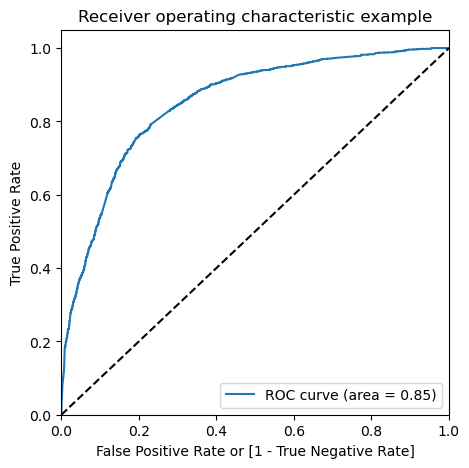

In [180]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [182]:
# Since we have higher (0.85) area under the ROC curve , therefore our model is a good one.